<a href="https://colab.research.google.com/github/Masakinka/python_for_ds_task/blob/main/2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на ноутбук: https://github.com/Masakinka/python_for_ds_task/blob/main/process_bank_churn.py

In [153]:
 # Підключення Google Drive
from google.colab import drive
drive.mount('/content/drive')

 # Додавання шляху до нотаток
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

# Завантаження розширення autoreload
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [154]:
!pip install opendatasets --upgrade --quiet

In [155]:
 # Імпорт необхідних функцій
import opendatasets as od
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
from process_bank_churn import preprocess_data, preprocess_new_data, main_process_data

In [156]:
# Налаштування відображення даних
pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [157]:
# Завантаження даних з Kaggle
dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu/'
od.download(dataset_url)
data_dir = './bank-customer-churn-prediction-dlu'
raw_df = pd.read_csv('./bank-customer-churn-prediction-dlu/train.csv')

Skipping, found downloaded files in "./bank-customer-churn-prediction-dlu" (use force=True to force download)


In [158]:
# Визначення колонок для виключення
excluded_cols = ['CustomerId', 'CreditScore', 'Tenure', 'HasCrCard', 'EstimatedSalary', 'Surname', 'id']
# Попередня обробка даних
datasets = preprocess_data(raw_df, excluded_cols)

In [159]:
# Виведення інформації про датасет
print("train_X shape:", datasets['train_X'].shape)
print("train_y shape:", datasets['train_y'].shape)
print("val_X shape:", datasets['val_X'].shape)
print("val_y shape:", datasets['val_y'].shape)
print("Input columns:", datasets['input_cols'])
print("Scaler:", datasets['scaler'])
print("Encoder:", datasets['encoder'])

# Перевірка оброблених даних
print(datasets['train_X'].head())

train_X shape: (12000, 9)
train_y shape: (12000,)
val_X shape: (3000, 9)
val_y shape: (3000,)
Input columns: ['Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']
Scaler: StandardScaler()
Encoder: OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    Age  Balance  NumOfProducts  IsActiveMember  Geography_France  Geography_Germany  Geography_Spain  Gender_Female  Gender_Male
0 -0.94     1.48          -1.11            1.02              1.00               0.00             0.00           0.00         1.00
1  0.16     2.25          -1.11           -0.98              1.00               0.00             0.00           1.00         0.00
2 -0.33     1.22           0.77           -0.98              0.00               1.00             0.00           0.00         1.00
3  2.50    -0.72           0.77            1.02              0.00               0.00             1.00           0.00         1.00
4

Вийшов такий самий датафрем, як я отримувала в таску HW 2.7 Логістична регресія з scikit learn

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [160]:
# Витягування навчальних та валідаційних вибірок
X_train = datasets['train_X']
y_train = datasets['train_y']
X_val = datasets['val_X']
y_val = datasets['val_y']

# Навчання класифікатора дерева рішень з фіксованим станом генератора випадкових чисел
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Прогнозування ймовірностей
y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

# Обчислення значень ROC AUC
roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

# Отримання глибини дерева
tree_depth = clf.get_depth()

In [161]:
print("ROC AUC Train:", roc_auc_train)
print("ROC AUC Validation:", roc_auc_val)
print("Tree Depth:", tree_depth)

ROC AUC Train: 0.9893268332533869
ROC AUC Validation: 0.8126582756018932
Tree Depth: 26


In [162]:
val_targets = pd.Series(y_val)
relative_frequencies = val_targets.value_counts(normalize=True)
print(f"Relative frequencies in the validation set:\n{relative_frequencies}")

Relative frequencies in the validation set:
Exited
0.00   0.80
1.00   0.20
Name: proportion, dtype: float64


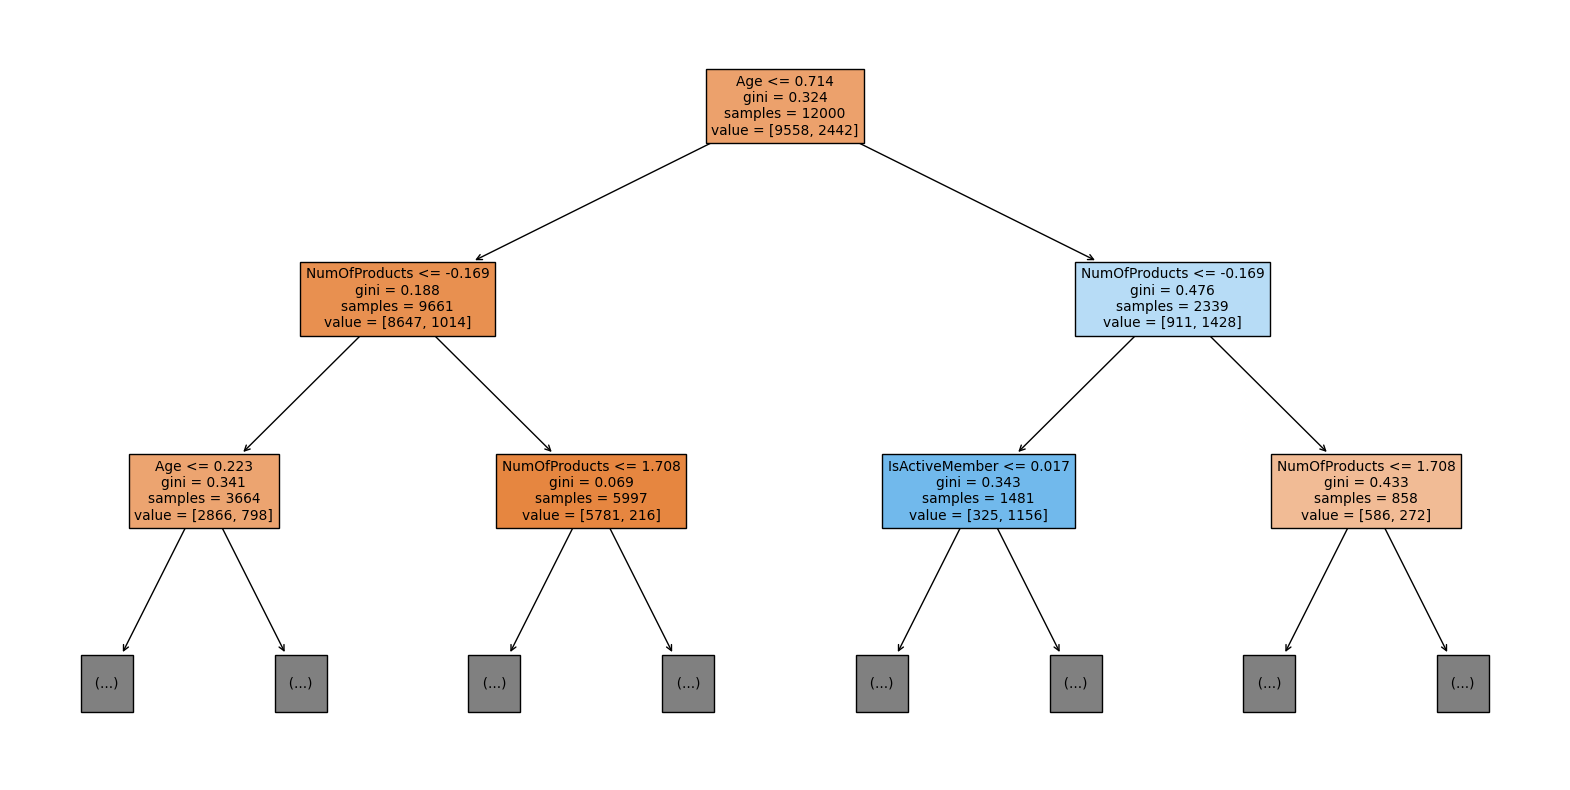

In [163]:
 # Побудова дерева до глибини 2 включно
plt.figure(figsize=(20, 10))
plot_tree(clf, max_depth=2, feature_names=X_train.columns, filled=True)
plt.show()

In [164]:
# Важливість ознак
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Топ-10 найважливіших ознак
top_10_features = importance_df.head(10)

top_10_features

,feature,importance
0,Age,0.45
1,Balance,0.24
2,NumOfProducts,0.21
3,IsActiveMember,0.04
5,Geography_Germany,0.02
8,Gender_Male,0.01
7,Gender_Female,0.01
6,Geography_Spain,0.01
4,Geography_France,0.01


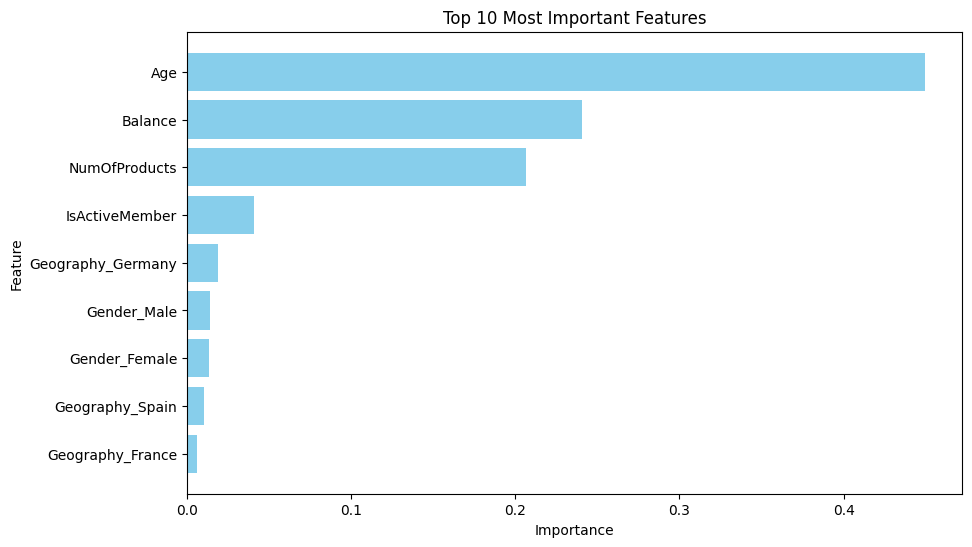

In [165]:
# Побудова графіку топ-10 найважливіших ознак
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['feature'], top_10_features['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

**Висновки:**
1. Високий ROC AUC для навчальної вибірки і значно нижчий ROC AUC для валідаційної вибірки вказує на те, що модель переобучена. Це означає, що модель добре підходить під навчальні дані, але не настільки добре узагальнює на нових даних.
2. Глибина дерева становить 27, що може свідчити про досить складну модель з осзнаками перенавчання, про що свідчить значення ROC AUC.
3. Найвпливовіші ознаки на рівні глибини 2 найбільш важливі ознаки - це NumOfProducts, Age та IsActiveMember.
4. Але з загальної важливості ознак для топ 10 значень видно, що найбільш впливовими є Age, NumOfProducts та Balance.

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [166]:
# Визначення функції для оцінки моделі
def evaluate_model(max_leaf_nodes, max_depth):
    clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

    roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
    roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

    return roc_auc_train, roc_auc_val, clf

In [167]:
# Визначення діапазону значень для max_leaf_nodes та max_depth
max_leaf_nodes_list = [10, 20, 30, 40, 50]
max_depth_list = [3, 5, 7, 9, 11]

best_roc_auc_val = 0
best_params = (None, None)
results = []

# Ітерація по різних значеннях та оцінка моделі
for max_leaf_nodes in max_leaf_nodes_list:
    for max_depth in max_depth_list:
        roc_auc_train, roc_auc_val, clf = evaluate_model(max_leaf_nodes, max_depth)
        results.append((max_leaf_nodes, max_depth, roc_auc_train, roc_auc_val))
        if roc_auc_val > best_roc_auc_val:
            best_roc_auc_val = roc_auc_val
            best_params = (max_leaf_nodes, max_depth)

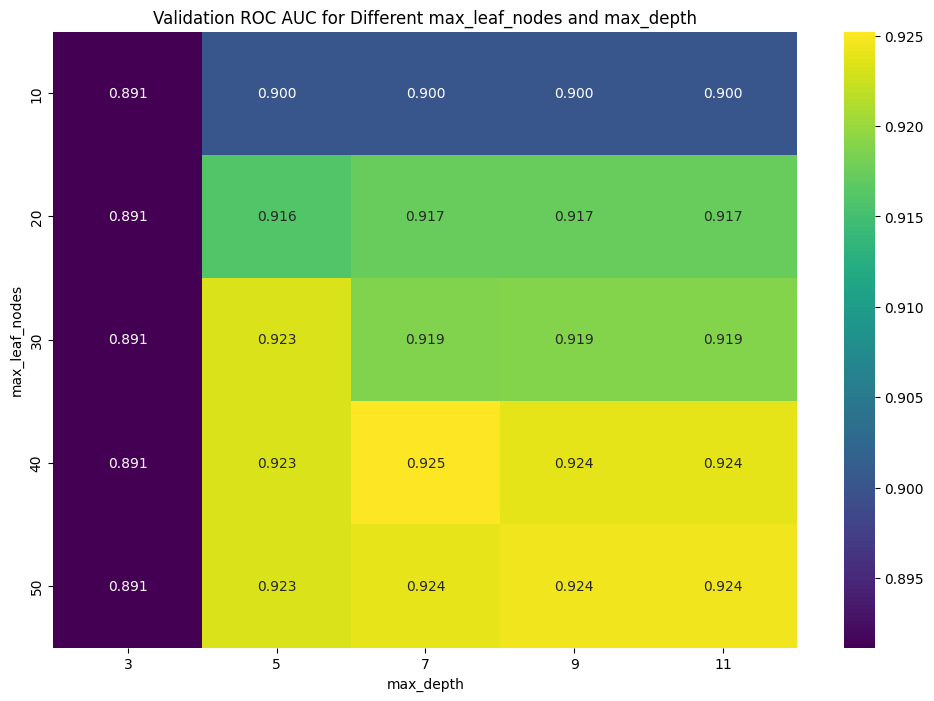

Найкраще значення max_leaf_nodes: 40
Найкраще значення max_depth: 7
Найкраще значення ROC AUC для валідаційної вибірки: 0.9252253240963029
Глибина найкращого дерева: 7
Найкраще значення ROC AUC для навчальної вибірки: 0.929678137305256
Найкраще значення ROC AUC для валідаційної вибірки: 0.9252253240963029


In [168]:
# Побудова графіку результатів
results_df = pd.DataFrame(results, columns=['max_leaf_nodes', 'max_depth', 'roc_auc_train', 'roc_auc_val'])
pivot_table = results_df.pivot_table(values='roc_auc_val', index='max_leaf_nodes', columns='max_depth')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis")
plt.title('Validation ROC AUC for Different max_leaf_nodes and max_depth')
plt.show()

# Виведення найкращих параметрів
print(f"Найкраще значення max_leaf_nodes: {best_params[0]}")
print(f"Найкраще значення max_depth: {best_params[1]}")
print(f"Найкраще значення ROC AUC для валідаційної вибірки: {best_roc_auc_val}")

# Навчання найкращої моделі та виведення глибини дерева
best_clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=best_params[0], max_depth=best_params[1])
best_clf.fit(X_train, y_train)
best_tree_depth = best_clf.get_depth()

print(f"Глибина найкращого дерева: {best_tree_depth}")

# Виведення значень ROC AUC для навчальної та валідаційної вибірок
best_roc_auc_train = roc_auc_score(y_train, best_clf.predict_proba(X_train)[:, 1])
best_roc_auc_val = roc_auc_score(y_val, best_clf.predict_proba(X_val)[:, 1])

print(f"Найкраще значення ROC AUC для навчальної вибірки: {best_roc_auc_train}")
print(f"Найкраще значення ROC AUC для валідаційної вибірки: {best_roc_auc_val}")

**Висновки**:
 1. В результаті експериментів з різними значеннями параметрів max_leaf_nodes та max_depth для моделі DecisionTreeClassifier, було знайдено оптимальні параметри, які дають найкращий результат на валідаційній вибірці.
 2. Значення ROC AUC для валідаційної вибірки є дуже близьким до значення ROC AUC для навчальної вибірки. Це вказує на те, що модель добре узагальнює на нових даних і не переобучена.
 3. В процесі експериментів були випробувані різні значення параметрів max_leaf_nodes та max_depth. Найкращі результати були отримані при max_leaf_nodes = 40 та max_depth = 9.
 4. Глибина найкращого дерева становить 8, що є значно меншим значенням у порівнянні з початковим деревом глибиною 27. Це також свідчить про те, що нова модель є простішою та краще узагальнює.
 5. Тобто Метод перебору значень дозволив знайти такі параметри моделі DecisionTreeClassifier, які забезпечують найкращу генералізацію на валідаційній вибірці. Оптимізація параметрів дозволила значно зменшити глибину дерева і підвищити значення ROC AUC на валідаційній вибірці до 0.9249152891144796, що є дуже добрим результатом.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [169]:
# Ітерація по значенням max_depth від 1 до 20
max_depth_values = range(1, 21)
train_auc = []
val_auc = []
train_errors = []
val_errors = []

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
    clf.fit(X_train, y_train)

    y_train_pred_proba = clf.predict_proba(X_train)[:, 1]
    y_val_pred_proba = clf.predict_proba(X_val)[:, 1]

    roc_auc_train = roc_auc_score(y_train, y_train_pred_proba)
    roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)

    train_auc.append(roc_auc_train)
    val_auc.append(roc_auc_val)

    train_error = log_loss(y_train, y_train_pred_proba)
    val_error = log_loss(y_val, y_val_pred_proba)

    train_errors.append(train_error)
    val_errors.append(val_error)

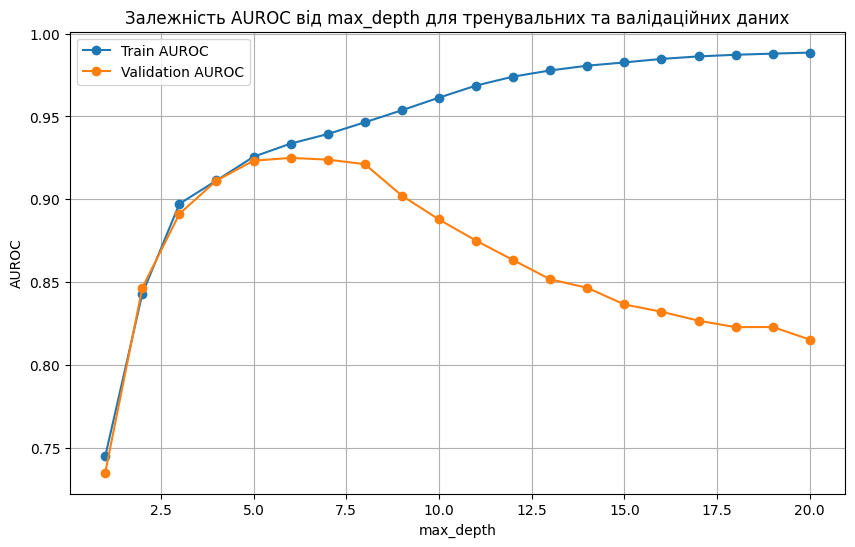

In [170]:
# Побудова графіку залежності AUROC від max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_auc, label='Train AUROC', marker='o')
plt.plot(max_depth_values, val_auc, label='Validation AUROC', marker='o')
plt.xlabel('max_depth')
plt.ylabel('AUROC')
plt.title('Залежність AUROC від max_depth для тренувальних та валідаційних даних')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
# Створення DataFrame для помилок
errors_df = pd.DataFrame({
    'Max Depth': max_depth_values,
    'Training Error': train_errors,
    'Validation Error': val_errors
})

# Відображення DataFrame з градієнтним фоном для Validation Error
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.400686,0.414233
1,2,0.347127,0.345845
2,3,0.290177,0.307230
3,4,0.274767,0.290782
4,5,0.256254,0.289340
5,6,0.243513,0.339806
6,7,0.232227,0.402828
7,8,0.219101,0.570823
8,9,0.202821,0.937905
9,10,0.184935,1.237863


**Висновки**:
1. На графіку видно, що значення AUROC для валідаційної вибірки досягає свого піку при max_depth 6-7.Після цього значення AUROC для валідаційної вибірки починає знижуватися, що вказує на початок переобучення.
2. Використання значень max_depth більше 7 призводить до перенавчання, що видно з зниження AUROC для валідаційної вибірки. Це значення слід уникати для забезпечення хорошої генералізації моделі.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [172]:
# Навчання моделей з max_depth 6 і 7
depths = [6, 7]
results = {}

for depth in depths:
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
    clf.fit(X_train, y_train)
    roc_auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    results[depth] = {'model': clf, 'roc_auc_train': roc_auc_train}

# Вибір моделі з найкращим результатом
best_depth = max(results, key=lambda x: results[x]['roc_auc_train'])
best_clf = results[best_depth]['model']

print(f"Найкраще значення max_depth: {best_depth}")

Найкраще значення max_depth: 7


In [173]:
# Навчання моделі з оптимальним значенням max_depth
optimal_max_depth = 7
best_clf = DecisionTreeClassifier(random_state=42, max_depth=optimal_max_depth)
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [174]:
test_df = pd.read_csv('./bank-customer-churn-prediction-dlu/test.csv')
test_df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.00,Chu,584.00,Germany,Male,30.00,2.00,146053.66,1.00,1.00,1.00,157891.86
1,15001,15642821.00,Mazzi,551.00,France,Male,39.00,5.00,0.00,2.00,1.00,1.00,67431.28
2,15002,15716284.00,Onyekachi,706.00,France,Male,43.00,8.00,0.00,2.00,1.00,0.00,156768.45
3,15003,15785078.00,Martin,717.00,Spain,Male,45.00,3.00,0.00,1.00,1.00,1.00,166909.87
4,15004,15662955.00,Kenechukwu,592.00,Spain,Male,43.00,8.00,0.00,2.00,1.00,1.00,143681.97


In [175]:
# Визначення змінних
input_cols = datasets['input_cols']
scaler = datasets['scaler']
encoder = datasets['encoder']

# Попередня обробка тестових даних
X_test = preprocess_new_data(test_df, input_cols, scaler, encoder, excluded_cols)

# Використання натренованої моделі для передбачення
best_clf = DecisionTreeClassifier(random_state=42, max_depth=7)
best_clf.fit(datasets['train_X'], datasets['train_y'])
predictions = best_clf.predict(X_test)

In [177]:
# Прогнозування ймовірностей для тренувальних та валідаційних вибірок
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# Обчислення AUROC для тренувальних та валідаційних вибірок
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Прогнозування для тестових даних
predictions = best_clf.predict(X_test)
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Виведення AUROC
print(f"AUROC для тренувальної вибірки: {roc_auc_train}")
print(f"AUROC для валідаційної вибірки: {roc_auc_val}")

AUROC для тренувальної вибірки: 0.9393145713767181
AUROC для валідаційної вибірки: 0.9238754372727898


In [176]:
# Load the sample submission file
submission_df =  pd.read_csv('./bank-customer-churn-prediction-dlu/sample_submission.csv')

# Ensure the 'Exited' column is filled with predictions
submission_df['Exited'] = predictions

# Save the updated DataFrame to a new CSV file
submission_df.to_csv('drive/MyDrive/Colab Notebooks/data//submission_tress.csv', index=False)

In [178]:
submission_df.head()

,id,Exited
0,15000,0.00
1,15001,0.00
2,15002,0.00
3,15003,1.00
4,15004,0.00


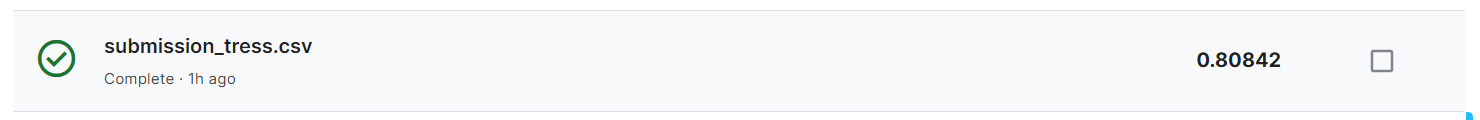

**Висновки: **
Згідно з результатами, модель логістичної регресії полінома 4 порядку показує кращі результати, ніж дерево рішень. Це може бути пов'язано з тим, що вона краще підходить для цього набору даних і проблеми класифікації, але я спробую ще декілька методів покращення результатів:
1. Пошуку оптимальних гіперпараметрів для дерева рішень за допомогою GridSearchCV.
2. Інжиніринг нових ознак таких як:
- Відношення залишку на рахунку до віку клієнта : raw_df['Balance_to_Age'] = raw_df['Balance'] / raw_df['Age']
- Кількість років з банком: raw_df['Years_with_Bank'] = raw_df['Tenure'] * raw_df['Age']
3. Знаючи про наявність дізбалансу класів можно спробувати тако ж Збалансування даних.

In [180]:
from sklearn.model_selection import GridSearchCV

In [185]:
# Пошук по сітці для визначення оптимальних гіперпараметрів
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='roc_auc', cv=5)
grid_search.fit(datasets['train_X'], datasets['train_y'])

# Найкраща модель
best_clf = grid_search.best_estimator_

# Прогнозування ймовірностей для тренувальних та валідаційних вибірок
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# Обчислення AUROC для тренувальних та валідаційних вибірок
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Прогнозування для тестових даних
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Виведення AUROC
print(f"AUROC для тренувальної вибірки: {roc_auc_train}")
print(f"AUROC для валідаційної вибірки: {roc_auc_val}")

AUROC для тренувальної вибірки: 0.9393922470664466
AUROC для валідаційної вибірки: 0.9255007202140064


In [186]:
# Load the sample submission file
submission_df =  pd.read_csv('./bank-customer-churn-prediction-dlu/sample_submission.csv')

# Ensure the 'Exited' column is filled with predictions
submission_df['Exited'] = predictions_proba

# Save the updated DataFrame to a new CSV file
submission_df.to_csv('drive/MyDrive/Colab Notebooks/data//submission_tres2.csv', index=False)

In [189]:
submission_df.head()

,id,Exited
0,15000,0.00
1,15001,0.03
2,15002,0.03
3,15003,0.71
4,15004,0.03


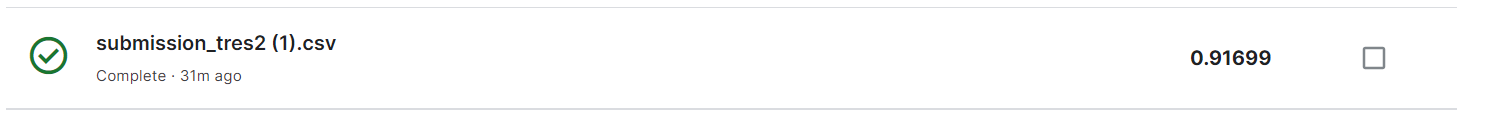

Використання пошуку оптимальних параметрів по сітці дало покращення результатів, але воно всеодно трохи нижче ніж для полінома 4 порядку, тож пробуємо ще.

In [193]:
# Додавання нових ознак
raw_df['Balance_to_Age'] = raw_df['Balance'] / raw_df['Age']
raw_df['Years_with_Bank'] = raw_df['Tenure'] * raw_df['Age']

# Повторна попередня обробка з новими ознаками
datasets = preprocess_data(raw_df, excluded_cols)

# Визначення змінних
input_cols = datasets['input_cols']
scaler = datasets['scaler']
encoder = datasets['encoder']

# Попередня обробка тестових даних з новими ознаками
test_df['Balance_to_Age'] = test_df['Balance'] / test_df['Age']
test_df['Years_with_Bank'] = test_df['Tenure'] * test_df['Age']
X_test = preprocess_new_data(test_df, input_cols, scaler, encoder, excluded_cols)

# Навчання та передбачення з найкращою моделлю
best_clf.fit(datasets['train_X'], datasets['train_y'])
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Прогнозування ймовірностей для тренувальних та валідаційних вибірок
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# Обчислення AUROC для тренувальних та валідаційних вибірок
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Виведення AUROC
print(f"AUROC для тренувальної вибірки: {roc_auc_train}")
print(f"AUROC для валідаційної вибірки: {roc_auc_val}")

AUROC для тренувальної вибірки: 0.9393922470664466
AUROC для валідаційної вибірки: 0.9255007202140064


In [191]:
# Ensure the 'Exited' column is filled with predictions
submission_df['Exited'] = predictions_proba

# Save the updated DataFrame to a new CSV file
submission_df.to_csv('drive/MyDrive/Colab Notebooks/data//submission_tres_fuching.csv', index=False)

In [192]:
submission_df.head()

,id,Exited
0,15000,0.00
1,15001,0.03
2,15002,0.03
3,15003,0.71
4,15004,0.03


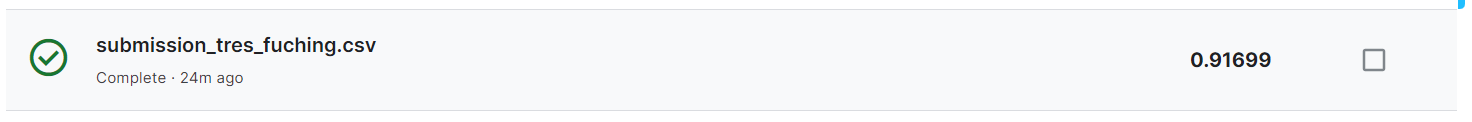

Додавання ознак ніяк не вплинуло, тому пробуємо отсанній спосіб з балансуванням

In [194]:
from imblearn.over_sampling import SMOTE

In [196]:
# Застосування SMOTE для збалансування класів у тренувальній вибірці
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(datasets['train_X'], datasets['train_y'])

# Повторне навчання моделі з збалансованими даними
best_clf.fit(X_resampled, y_resampled)
y_train_pred_proba = best_clf.predict_proba(datasets['train_X'])[:, 1]
y_val_pred_proba = best_clf.predict_proba(datasets['val_X'])[:, 1]

# Обчислення AUROC для тренувальних та валідаційних вибірок
roc_auc_train = roc_auc_score(datasets['train_y'], y_train_pred_proba)
roc_auc_val = roc_auc_score(datasets['val_y'], y_val_pred_proba)

# Прогнозування для тестових даних
predictions_proba = best_clf.predict_proba(X_test)[:, 1]

# Виведення AUROC
print(f"AUROC для тренувальної вибірки: {roc_auc_train}")
print(f"AUROC для валідаційної вибірки: {roc_auc_val}")

AUROC для тренувальної вибірки: 0.936205080272877
AUROC для валідаційної вибірки: 0.9167833870635844


In [197]:
# Ensure the 'Exited' column is filled with predictions
submission_df['Exited'] = predictions_proba

# Save the updated DataFrame to a new CSV file
submission_df.to_csv('drive/MyDrive/Colab Notebooks/data//submission_tres_balance.csv', index=False)

Висновки: не дивлячись на те, шо по значенням AUROC збалансовані дерева ють нижче результат, але порівнчно з пошуком гупер параметрів вони показали себе трохи краще.
Відчувається, що як раз вирішення цієї задачі за допомогою ансамблів може надати накращі результати для цієї задачі.

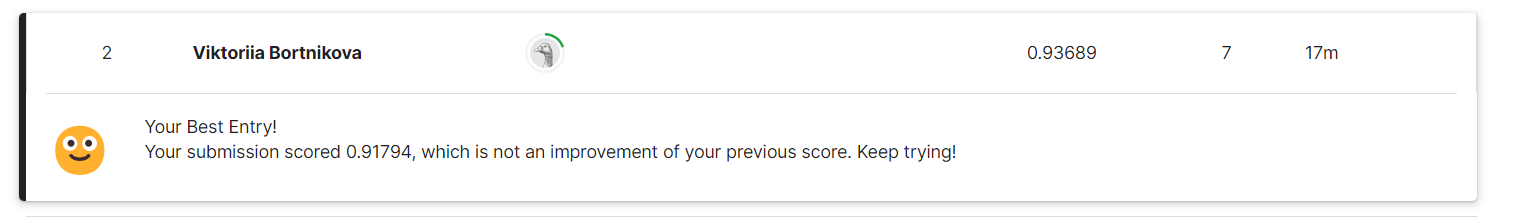